<a href="https://colab.research.google.com/github/maedehesmz8010/HW3_810602161/blob/main/HW3_810602161.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
from google.colab import files

uploaded = files.upload()
milling = pd.read_csv('milling_machine.csv')

print("Sakhtare kolie dadeha:")
print(milling.info())

print("Kholase amarie dadeha:")
print(milling.describe())

Saving milling_machine.csv to milling_machine (3).csv
Sakhtare kolie dadeha:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Air Temp (°C)           9965 non-null   float64
 1   Process Temp (°C)       9990 non-null   float64
 2   Rotational Speed (RPM)  10000 non-null  float64
 3   Torque (Nm)             10000 non-null  float64
 4   Tool Wear (Seconds)     9993 non-null   float64
 5   Failure Types           9991 non-null   object 
dtypes: float64(5), object(1)
memory usage: 468.9+ KB
None
Kholase amarie dadeha:
       Air Temp (°C)  Process Temp (°C)  Rotational Speed (RPM)   Torque (Nm)  \
count    9965.000000        9990.000000            10000.000000  10000.000000   
mean       28.516926          80.812186             1401.909988     46.998845   
std         7.719340          15.548350              968.446183    

In [5]:
import numpy as np

milling['Failure Binary'] = np.where(milling['Failure Types'].isnull(), np.nan,
                                (milling['Failure Types'] != 'No Failure').astype(int))


# Hazfe sutune failure types ghabl az binary shodan
milling = milling.drop(columns=['Failure Types'])

# Maghadire gomshode dar har sotoon
missing_count = milling.isnull().sum()
missing_ratio = (milling.isnull().mean() * 100).round(2)

missing_milling = pd.DataFrame({'Missing Count': missing_count,
                                'Missing Ratio (%)': missing_ratio})

print("Maghadire namojoud dar har sotoon:")
print(missing_milling)

Maghadire namojoud dar har sotoon:
                        Missing Count  Missing Ratio (%)
Air Temp (°C)                      35               0.35
Process Temp (°C)                  10               0.10
Rotational Speed (RPM)              0               0.00
Torque (Nm)                         0               0.00
Tool Wear (Seconds)                 7               0.07
Failure Binary                      9               0.09


                        Air Temp (°C)  Process Temp (°C)  \
Air Temp (°C)                1.000000           0.693634   
Process Temp (°C)            0.693634           1.000000   
Rotational Speed (RPM)       0.156958          -0.086616   
Torque (Nm)                  0.213051           0.002808   
Tool Wear (Seconds)         -0.266371           0.188924   
Failure Binary               0.230165           0.353105   

                        Rotational Speed (RPM)  Torque (Nm)  \
Air Temp (°C)                         0.156958     0.213051   
Process Temp (°C)                    -0.086616     0.002808   
Rotational Speed (RPM)                1.000000     0.888487   
Torque (Nm)                           0.888487     1.000000   
Tool Wear (Seconds)                  -0.256103    -0.216528   
Failure Binary                       -0.183681    -0.241635   

                        Tool Wear (Seconds)  Failure Binary  
Air Temp (°C)                     -0.266371        0.230165  
Process Temp 

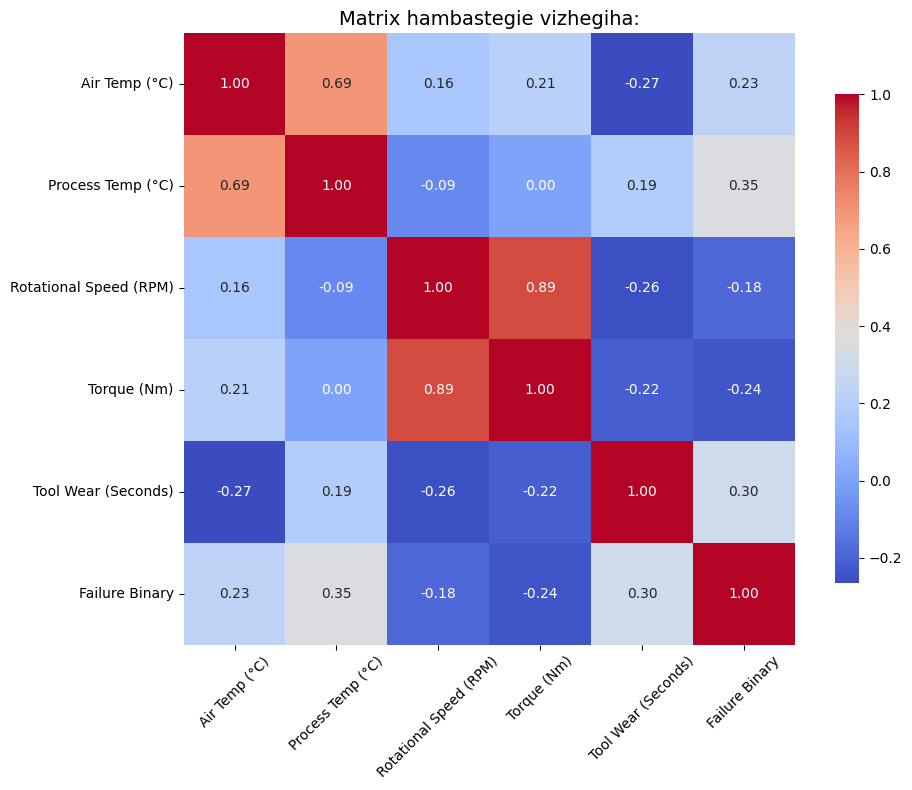

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sotoonhaye adadi
sutun_adadi = milling.select_dtypes(include=['float64', 'int64'])

corr_matrix = sutun_adadi.corr()
print(corr_matrix)

# Vabastegie vizhegiha
print("Hambastegie vizhegiha ba vaziate abzar (Binary shodeye sotoon failure types):")
print(corr_matrix['Failure Binary'].drop('Failure Binary').sort_values(ascending=False))

# Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True, cbar_kws={"shrink": .8})
plt.title('Matrix hambastegie vizhegiha:', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [7]:
# 3 vizhegi ba hambastegie bishtar
correlations = corr_matrix['Failure Binary'].drop('Failure Binary').abs().sort_values(ascending=False)
vizhegiha = correlations.head(3).index.tolist()
print("3 vizhegi ba bishtarin hambastegi ba khuruji:")
print(vizhegiha)


3 vizhegi ba bishtarin hambastegi ba khuruji:
['Process Temp (°C)', 'Tool Wear (Seconds)', 'Torque (Nm)']


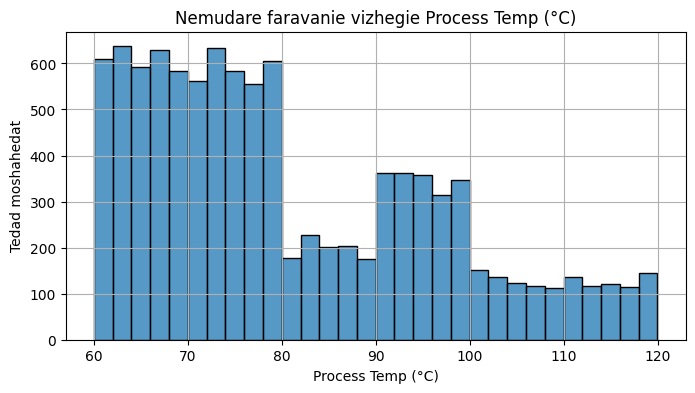

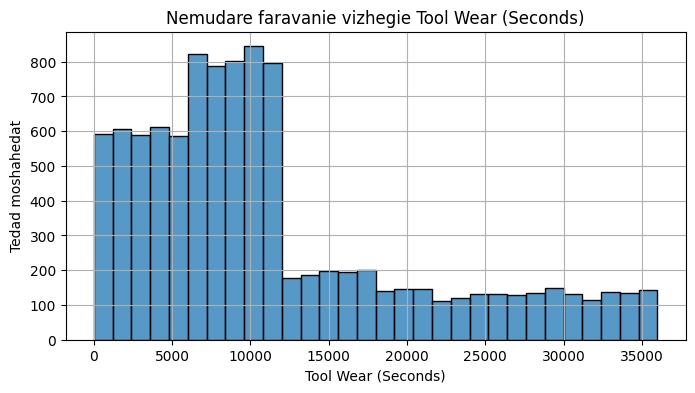

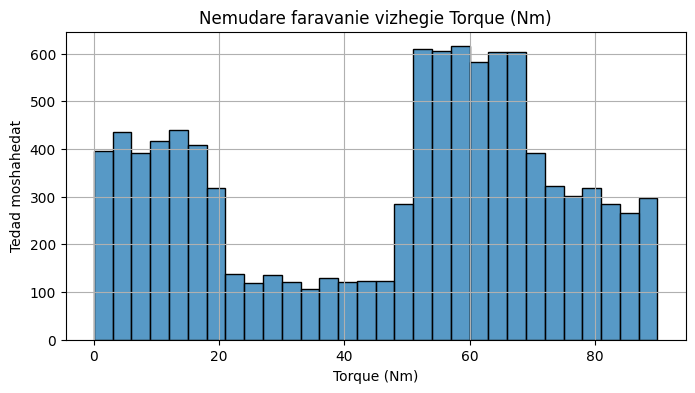

In [8]:
# Rasme nemudare faravani
for feature in vizhegiha:
    plt.figure(figsize=(8, 4))
    sns.histplot(milling[feature], bins=30, kde=False)
    plt.title(f'Nemudare faravanie vizhegie {feature}')
    plt.xlabel(feature)
    plt.ylabel('Tedad moshahedat')
    plt.grid(True)
    plt.show()


In [9]:
# Jaygozinie maghadire gomshode ba miangin baraye sutunhaye adadi
sutun_adadi_gomshode = missing_milling.index[missing_milling['Missing Count'] > 0]

for col in sutun_adadi_gomshode:
    if milling[col].dtype in ['float64', 'int64']:
        milling[col] = milling[col].fillna(milling[col].mean())

# Jaygozinie maghadire gomshode ba mode baraye sutunhaye daste bandi
sutun_daste_gomshode = missing_milling.index[missing_milling['Missing Count'] > 0]

for col in sutun_daste_gomshode:
    if milling[col].dtype == 'object':
        milling[col] = milling[col].fillna(milling[col].mode()[0])

# Barresi mojadad
missing_count_after = milling.isnull().sum()
missing_ratio_after = (milling.isnull().mean() * 100).round(2)

missing_milling_after = pd.DataFrame({
    'Missing Count': missing_count_after,
    'Missing Ratio (%)': missing_ratio_after
})

print("Maghadire namojoud pas az jaygozini:")
print(missing_milling_after)

Maghadire namojoud pas az jaygozini:
                        Missing Count  Missing Ratio (%)
Air Temp (°C)                       0                0.0
Process Temp (°C)                   0                0.0
Rotational Speed (RPM)              0                0.0
Torque (Nm)                         0                0.0
Tool Wear (Seconds)                 0                0.0
Failure Binary                      0                0.0


In [10]:
from sklearn.preprocessing import StandardScaler

target_cols = ['Failure Binary', 'Failure Types']

sutun_adadi = milling.select_dtypes(include=['float64', 'int64']).columns
sutun_adadi = [col for col in sutun_adadi if col not in target_cols]

# Shey'e standard
scaler = StandardScaler()

# Standardsazi sutunhaye adadi
milling[sutun_adadi] = scaler.fit_transform(milling[sutun_adadi])

print("Dadeha pas az standardsazi:")
print(milling[sutun_adadi].describe())

Dadeha pas az standardsazi:
       Air Temp (°C)  Process Temp (°C)  Rotational Speed (RPM)   Torque (Nm)  \
count   1.000000e+04       1.000000e+04            1.000000e+04  1.000000e+04   
mean   -1.818989e-16       1.136868e-16            6.821210e-17  2.955858e-16   
std     1.000050e+00       1.000050e+00            1.000050e+00  1.000050e+00   
min    -1.105137e+00      -1.339162e+00           -1.447610e+00 -1.756613e+00   
25%    -6.920985e-01      -8.181528e-01           -1.010161e+00 -1.080802e+00   
50%    -2.954023e-01      -2.726269e-01           -2.567349e-02  2.985232e-01   
75%     1.101337e-01       7.729670e-01            9.356279e-01  7.574701e-01   
max     2.787784e+00       2.519907e+00            1.650194e+00  1.607488e+00   

       Tool Wear (Seconds)  
count         10000.000000  
mean              0.000000  
std               1.000050  
min              -1.262752  
25%              -0.705906  
50%              -0.265293  
75%               0.401393  
max       

In [10]:
# # Normal sazi
# from sklearn.preprocessing import MinMaxScaler

# # Shey'e Normal sazi
# scaler = MinMaxScaler()

# milling[sutun_adadi] = scaler.fit_transform(milling[sutun_adadi])

# print("Dadeha pas az normal sazi:")
# print(milling[sutun_adadi].describe())


In [11]:
# Sutune jadid ba barchasbe "no failure" va "failure"
milling['Failure Label'] = np.where(milling['Failure Binary'] == 0, 'No Failure', 'Failure')

# Tedad barchasbha
failure_counts = milling['Failure Label'].value_counts()

print("Tedad nemuneha baraye har barchasb:")
print(failure_counts)

Tedad nemuneha baraye har barchasb:
Failure Label
Failure       8002
No Failure    1998
Name: count, dtype: int64


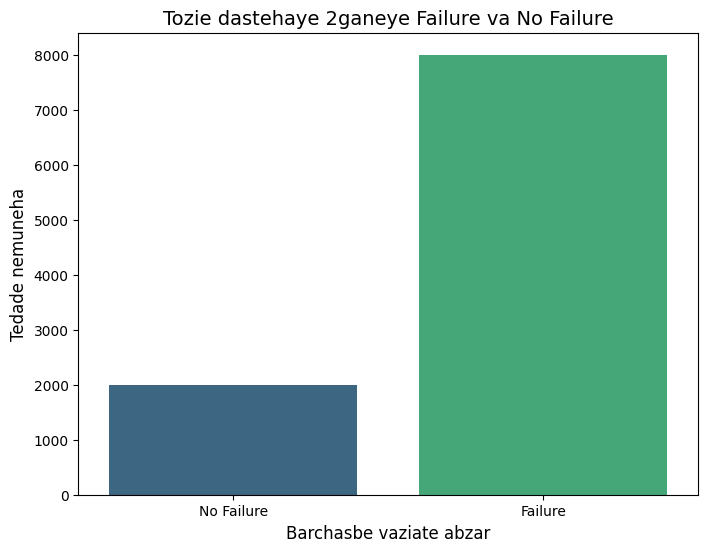

In [12]:
# Nemudar mileyi
plt.figure(figsize=(8, 6))
sns.countplot(data=milling, x='Failure Label', hue='Failure Label', palette='viridis', legend=False)

plt.title('Tozie dastehaye 2ganeye Failure va No Failure', fontsize=14)
plt.xlabel('Barchasbe vaziate abzar', fontsize=12)
plt.ylabel('Tedade nemuneha', fontsize=12)
plt.show()

In [13]:
!pip install imbalanced-learn

Tedad nemuneha pas az motevazen sazi: Counter({'No Failure': 8002, 'Failure': 8002})


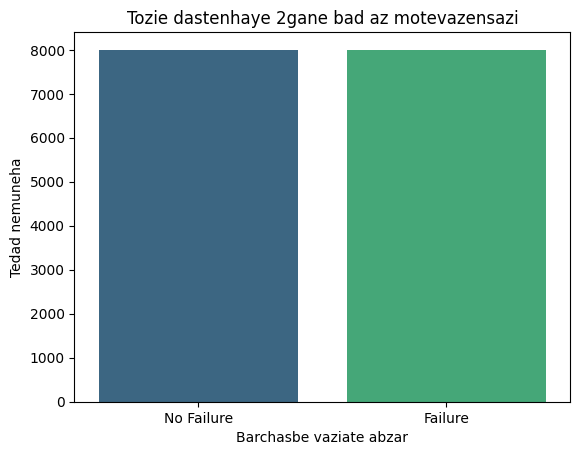

In [14]:
from imblearn.over_sampling import SMOTE
from collections import Counter

# Vizhegi
X = milling.drop(columns=['Failure Label', 'Failure Binary'])
# Hadaf
y = milling['Failure Label']

# Emale SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

print("Tedad nemuneha pas az motevazen sazi:", Counter(y_resampled))

# Tedad nemuneha dar har daste
sns.countplot(x=y_resampled, hue=y_resampled, palette='viridis', legend=False)
plt.title('Tozie dastenhaye 2gane bad az motevazensazi')
plt.xlabel('Barchasbe vaziate abzar')
plt.ylabel('Tedad nemuneha')
plt.show()

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
     X_resampled, y_resampled, test_size=0.2, random_state=42,
     stratify=y_resampled)

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

models = {'Logistic Regression': LogisticRegression(max_iter=1000),
          'KNN (k=5)': KNeighborsClassifier(n_neighbors=5),
          'SVM (Linear Kernel)': SVC(kernel='linear'),
          'SVM (RBF Kernel)': SVC(kernel='rbf')}

for name, model in models.items():
    print(f"Model: {name}")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(classification_report(y_test, y_pred))
    print("Matrix ashoftegi:")
    print(confusion_matrix(y_test, y_pred))

Model: Logistic Regression
              precision    recall  f1-score   support

     Failure       0.84      0.79      0.82      1601
  No Failure       0.80      0.85      0.83      1600

    accuracy                           0.82      3201
   macro avg       0.82      0.82      0.82      3201
weighted avg       0.82      0.82      0.82      3201

Matrix ashoftegi:
[[1272  329]
 [ 243 1357]]
Model: KNN (k=5)
              precision    recall  f1-score   support

     Failure       1.00      1.00      1.00      1601
  No Failure       1.00      1.00      1.00      1600

    accuracy                           1.00      3201
   macro avg       1.00      1.00      1.00      3201
weighted avg       1.00      1.00      1.00      3201

Matrix ashoftegi:
[[1601    0]
 [   0 1600]]
Model: SVM (Linear Kernel)
              precision    recall  f1-score   support

     Failure       0.88      0.77      0.82      1601
  No Failure       0.80      0.90      0.84      1600

    accuracy         

In [17]:
from sklearn.model_selection import cross_val_score

print("Natayeje Cross Validation:")
for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    print(f"{name}: دقت میانگین = {scores.mean():.4f}, انحراف معیار = {scores.std():.4f}")

Natayeje Cross Validation:
Logistic Regression: دقت میانگین = 0.8332, انحراف معیار = 0.0041
KNN (k=5): دقت میانگین = 0.9997, انحراف معیار = 0.0002
SVM (Linear Kernel): دقت میانگین = 0.8438, انحراف معیار = 0.0052
SVM (RBF Kernel): دقت میانگین = 0.9995, انحراف معیار = 0.0004


In [18]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

param_knn = {'n_neighbors': [3, 5, 7, 9, 11]}
grid_knn = GridSearchCV(KNeighborsClassifier(), param_knn, cv=5, scoring='accuracy')
grid_knn.fit(X_train, y_train)

print("Behtarin Parameterha baraye KNN:", grid_knn.best_params_)
print("Behtarin deghat:", grid_knn.best_score_)


Behtarin Parameterha baraye KNN: {'n_neighbors': 3}
Behtarin deghat: 0.9996875915169856


In [19]:
from sklearn.linear_model import LogisticRegression

param_logreg = {'C': [0.01, 0.1, 1, 10],'penalty': ['l2'],
    'solver': ['lbfgs']}

grid_logreg = GridSearchCV(LogisticRegression(max_iter=1000), param_logreg, cv=5, scoring='accuracy')
grid_logreg.fit(X_train, y_train)

print("Behtarin Parameterha baraye Logistic Regression:", grid_logreg.best_params_)
print("Behtarin deghat:", grid_logreg.best_score_)


Behtarin Parameterha baraye Logistic Regression: {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
Behtarin deghat: 0.8395689855037094


In [20]:
from sklearn.svm import SVC

param_svm_linear = {'C': [0.1, 1, 10],'kernel': ['linear']}

grid_svm_linear = GridSearchCV(SVC(), param_svm_linear, cv=5, scoring='accuracy')
grid_svm_linear.fit(X_train, y_train)

print("Behtarin Parameterha baraye SVM (Khati):", grid_svm_linear.best_params_)
print("Behtarin deghat:", grid_svm_linear.best_score_)


Behtarin Parameterha baraye SVM (Khati): {'C': 0.1, 'kernel': 'linear'}
Behtarin deghat: 0.84667704876025


In [21]:
param_svm_rbf = {'C': [0.1, 1, 10],'gamma': [0.01, 0.1, 1],'kernel': ['rbf']}

grid_svm_rbf = GridSearchCV(SVC(), param_svm_rbf, cv=5, scoring='accuracy')
grid_svm_rbf.fit(X_train, y_train)

print("Behtarin Parameterha baraye SVM (Gheyre khati):", grid_svm_rbf.best_params_)
print("Behtarin deghat:", grid_svm_rbf.best_score_)


Behtarin Parameterha baraye SVM (Gheyre khati): {'C': 1, 'gamma': 1, 'kernel': 'rbf'}
Behtarin deghat: 0.9998437805056619


In [22]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
from sklearn.metrics import classification_report, accuracy_score

X = milling.drop(columns=['Failure Label'])
y = milling['Failure Label']  # Barchasbe hadaf
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# KNN
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
print("Deghate KNN:", accuracy_score(y_test, knn_pred))
print(classification_report(y_test, knn_pred))

# Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)
print("Deghate Decision Tree:", accuracy_score(y_test, dt_pred))
print(classification_report(y_test, dt_pred))

# Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
print("Deghate Random Forest:", accuracy_score(y_test, rf_pred))
print(classification_report(y_test, rf_pred))

# SVM (One-vs-Rest)
svm = OneVsRestClassifier(SVC(kernel='linear', random_state=42))
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)
print("Deghate SVM (One-vs-Rest):", accuracy_score(y_test, svm_pred))
print(classification_report(y_test, svm_pred))

# SVM (One-vs-One)
svm_ovo = OneVsOneClassifier(SVC(kernel='linear', random_state=42))
svm_ovo.fit(X_train, y_train)
svm_ovo_pred = svm_ovo.predict(X_test)
print("Deghate SVM (One-vs-One):", accuracy_score(y_test, svm_ovo_pred))
print(classification_report(y_test, svm_ovo_pred))


Deghate KNN: 1.0
              precision    recall  f1-score   support

     Failure       1.00      1.00      1.00      1590
  No Failure       1.00      1.00      1.00       410

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000

Deghate Decision Tree: 1.0
              precision    recall  f1-score   support

     Failure       1.00      1.00      1.00      1590
  No Failure       1.00      1.00      1.00       410

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000

Deghate Random Forest: 1.0
              precision    recall  f1-score   support

     Failure       1.00      1.00      1.00      1590
  No Failure       1.00      1.00      1.00       410

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
wei

Mapping LabelEncoder:
{'Heat Dissipation Failure': np.int64(0), 'No Failure': np.int64(1), 'Overstrain': np.int64(2), 'Power Failure': np.int64(3), 'Tool Wear Failure': np.int64(4)}


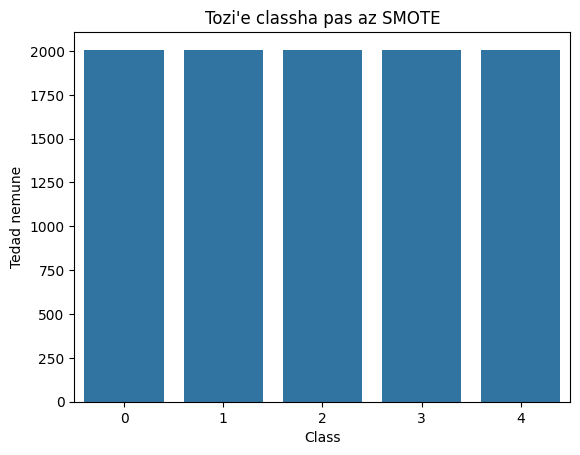

Model: KNN
[[402   0   0   0   0]
 [  0 401   0   0   0]
 [  0   0 401   0   0]
 [  0   0   0 402   0]
 [  0   0   0   0 401]]
                          precision    recall  f1-score   support

Heat Dissipation Failure       1.00      1.00      1.00       402
              No Failure       1.00      1.00      1.00       401
              Overstrain       1.00      1.00      1.00       401
           Power Failure       1.00      1.00      1.00       402
       Tool Wear Failure       1.00      1.00      1.00       401

                accuracy                           1.00      2007
               macro avg       1.00      1.00      1.00      2007
            weighted avg       1.00      1.00      1.00      2007

Model: Decision Tree
[[400   2   0   0   0]
 [  1 400   0   0   0]
 [  0   0 401   0   0]
 [  0   0   0 402   0]
 [  0   0   0   0 401]]
                          precision    recall  f1-score   support

Heat Dissipation Failure       1.00      1.00      1.00       402
      

In [23]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.multiclass import OneVsOneClassifier, OneVsRestClassifier
from collections import Counter

milling = pd.read_csv("milling_machine.csv")

# Barchasbgozarie chandgane
milling['Failure Types'] = milling['Failure Types'].fillna("No Failure")

# Pishpardazesh
numeric_features = milling.select_dtypes(include=['float64', 'int64']).columns
milling[numeric_features] = milling[numeric_features].fillna(milling[numeric_features].mean())

# Standardsazi
scaler = StandardScaler()
milling[numeric_features] = scaler.fit_transform(milling[numeric_features])

# Ramzgozarie barchasbha
le = LabelEncoder()
milling['Failure_Label_Multi'] = le.fit_transform(milling['Failure Types'])

# Namayeshe barchasbha
label_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Mapping LabelEncoder:")
print(label_mapping)


X = milling.drop(columns=['Failure Types', 'Failure_Label_Multi'])
y = milling['Failure_Label_Multi']

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

sns.countplot(x=y_resampled)
plt.title("Tozi'e classha pas az SMOTE")
plt.xlabel("Class")
plt.ylabel("Tedad nemune")
plt.show()

X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, stratify=y_resampled, random_state=42)

# Modelha
models = {
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM (OvR)': OneVsRestClassifier(SVC(kernel='rbf', random_state=42)),
    'SVM (OvO)': OneVsOneClassifier(SVC(kernel='rbf', random_state=42)),}
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = (y_pred == y_test).mean()
    print(f"Model: {name}")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred, target_names=le.classes_))
    results[name] = acc


In [24]:
# KNN
param_grid_knn = {'n_neighbors': [3, 5, 7, 9]}
grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5, scoring='accuracy')
grid_knn.fit(X_train, y_train)

# Decision Tree
param_grid_tree = {'max_depth': [5, 10, 15],'min_samples_split': [2, 5, 10]}
grid_tree = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid_tree, cv=5, scoring='accuracy')
grid_tree.fit(X_train, y_train)

# Random Forest
param_grid_rf = {'n_estimators': [50, 100],'max_depth': [5, 10, None]}
grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5, scoring='accuracy')
grid_rf.fit(X_train, y_train)

# SVM OvR
param_grid_svm_ovr = {'estimator__C': [0.1, 1, 10],'estimator__gamma': [0.01, 0.1, 1]}
grid_svm_ovr = GridSearchCV(OneVsRestClassifier(SVC(kernel='rbf')), param_grid_svm_ovr, cv=5, scoring='accuracy')
grid_svm_ovr.fit(X_train, y_train)

# SVM OvO
grid_svm_ovo = GridSearchCV(OneVsOneClassifier(SVC(kernel='rbf')), param_grid_svm_ovr, cv=5, scoring='accuracy')
grid_svm_ovo.fit(X_train, y_train)

print("Behtarin parameterha:")
print("KNN:", grid_knn.best_params_)
print("Decision Tree:", grid_tree.best_params_)
print("Random Forest:", grid_rf.best_params_)
print("SVM (OvR):", grid_svm_ovr.best_params_)
print("SVM (OvO):", grid_svm_ovo.best_params_)


Behtarin parameterha:
KNN: {'n_neighbors': 3}
Decision Tree: {'max_depth': 5, 'min_samples_split': 5}
Random Forest: {'max_depth': 5, 'n_estimators': 50}
SVM (OvR): {'estimator__C': 1, 'estimator__gamma': 1}
SVM (OvO): {'estimator__C': 1, 'estimator__gamma': 1}


In [ ]:
# from sklearn.model_selection import cross_val_score

# for name, model in models_multiclass.items():
#     scores = cross_val_score(model, X_multi_scaled, y_multi, cv=5)
#     print(f"{name}: میانگین دقت (5-Fold CV) = {scores.mean():.4f}")